# Pandas Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
# see the pre-defined styles provided.
plt.style.available

['grayscale',
 'seaborn-colorblind',
 'seaborn-bright',
 'seaborn-deep',
 'seaborn-pastel',
 'classic',
 'seaborn-muted',
 'seaborn-darkgrid',
 'seaborn-white',
 'seaborn-paper',
 'seaborn-dark',
 'seaborn-whitegrid',
 'dark_background',
 'seaborn-poster',
 'ggplot',
 'seaborn-ticks',
 'seaborn-dark-palette',
 'seaborn-notebook',
 'bmh',
 'seaborn-talk',
 'fivethirtyeight',
 'seaborn']

In [3]:
# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

### DataFrame.plot

In [6]:
'''
 Let's make a DataFrame. First, we'll set the seed for the random number generator, which will allow us to reproduce the data. 
Next, let's add three columns of random time series data. 
We can generate the random data by cumulatively summing up random numbers. 
numpi has a great function for this called cumsum, which cumulatively sums an array .
Let's do this for three columns, A, B and C. And also offset the B column by + 20 and the C column by- 20. Using date_range, we can set the index to be everyday in 2017. 
Now let's see what this data looks like a little more visually to plot this data we can use the plot method on the DataFrame. 
'''

np.random.seed(123)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2017', periods=365))
df.head()

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


<IPython.core.display.Javascript object>


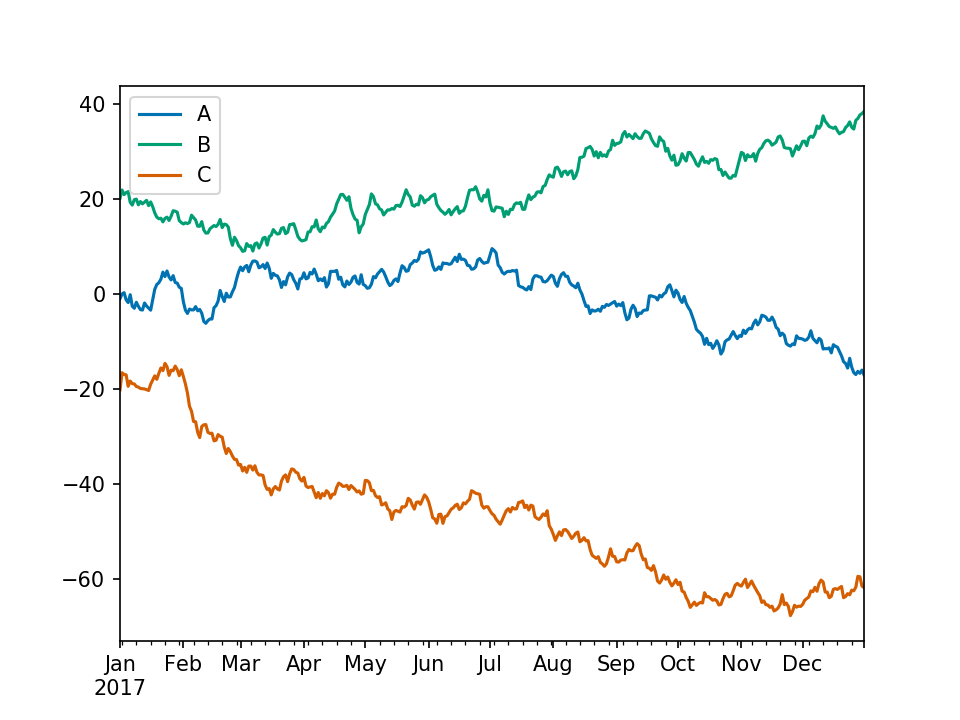

In [9]:
df.plot(); # add a semi-colon to the end of the plotting call to suppress unwanted output

We can select which plot we want to use by passing it into the 'kind' parameter.

<IPython.core.display.Javascript object>


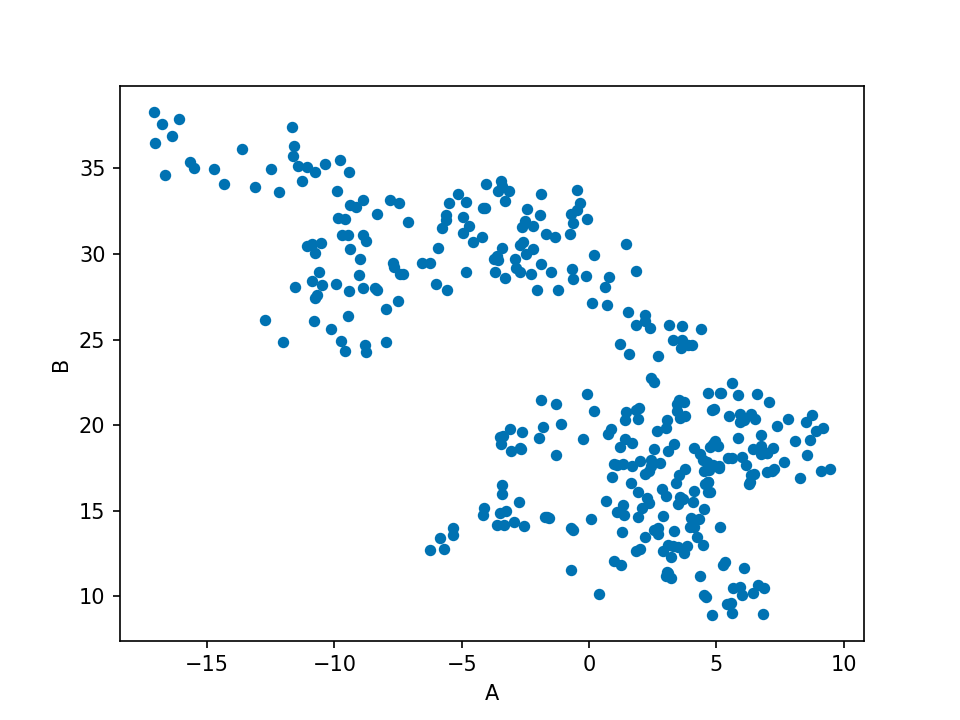

In [10]:
df.plot('A','B', kind = 'scatter');

You can also choose the plot kind by using the `DataFrame.plot.kind` methods instead of providing the `kind` keyword argument.

`kind` :
- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh'` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : same as 'kde'
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot

<IPython.core.display.Javascript object>


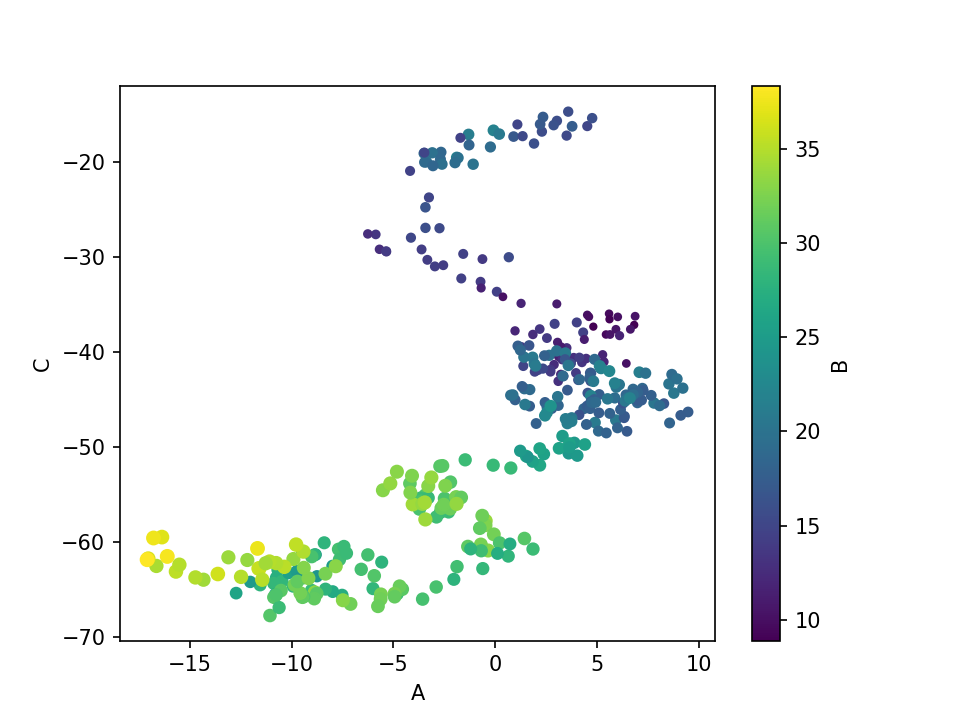

In [13]:
# create a scatter plot of columns 'A' and 'C', with changing color (c) and size (s) based on column 'B'
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')

<IPython.core.display.Javascript object>


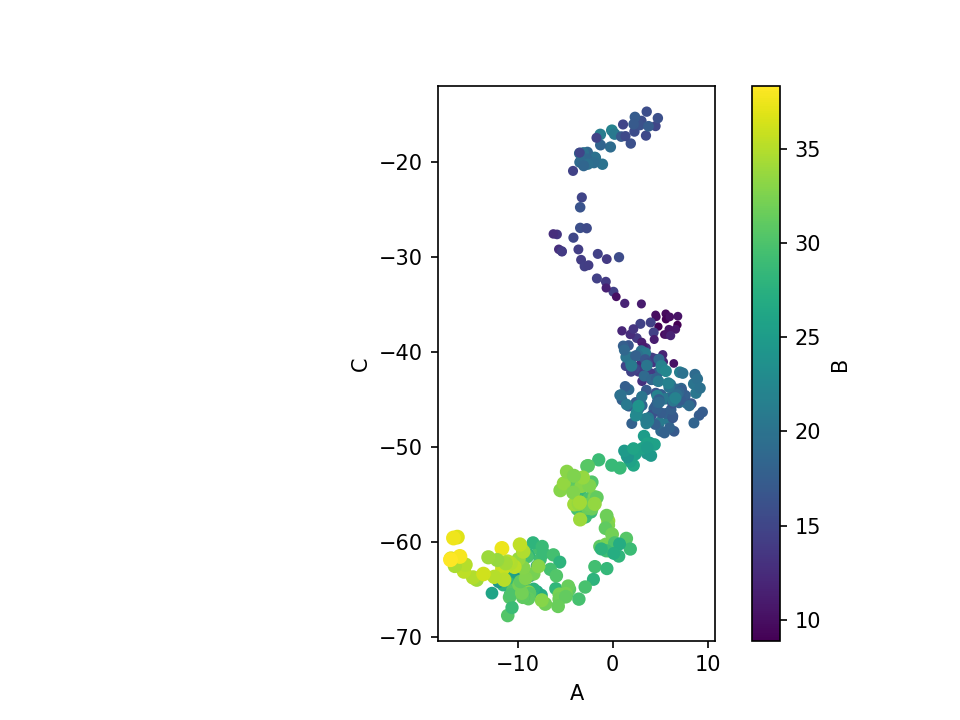

In [14]:
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
ax.set_aspect('equal')

<IPython.core.display.Javascript object>


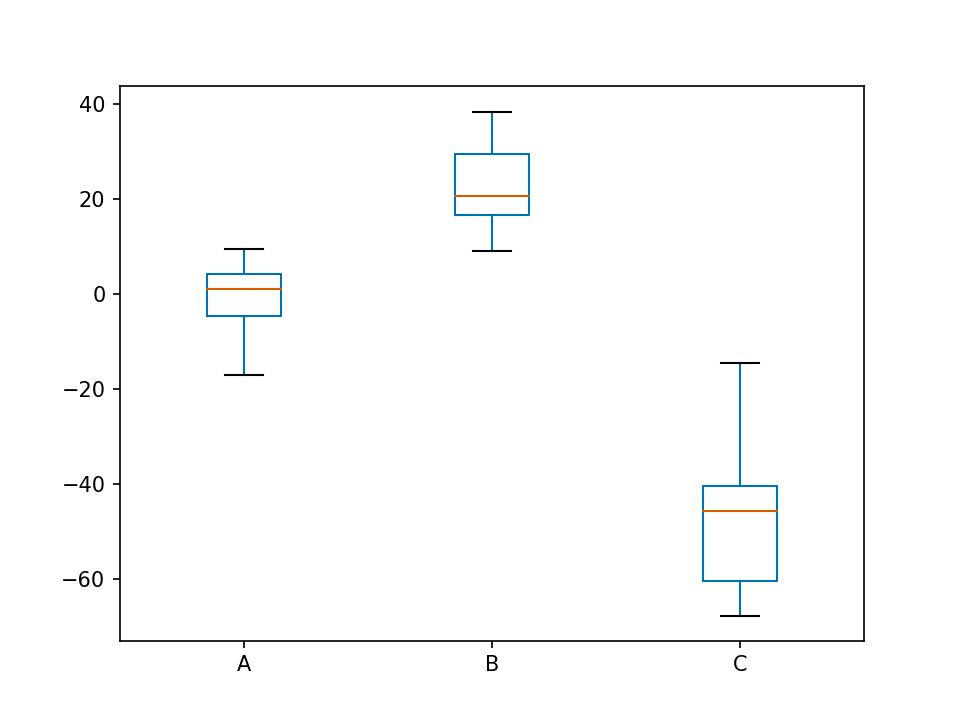

In [15]:
df.plot.box();

<IPython.core.display.Javascript object>


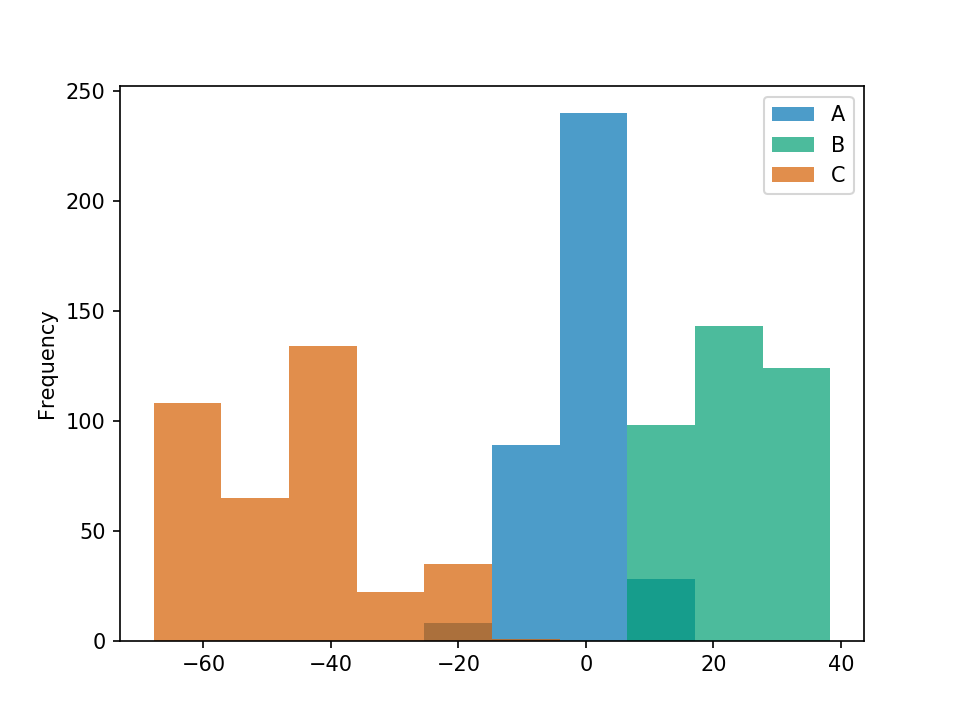

In [16]:
df.plot.hist(alpha=0.7);

[Kernel density estimation plots](https://en.wikipedia.org/wiki/Kernel_density_estimation) are useful for deriving a smooth continuous function from a given sample.

<IPython.core.display.Javascript object>


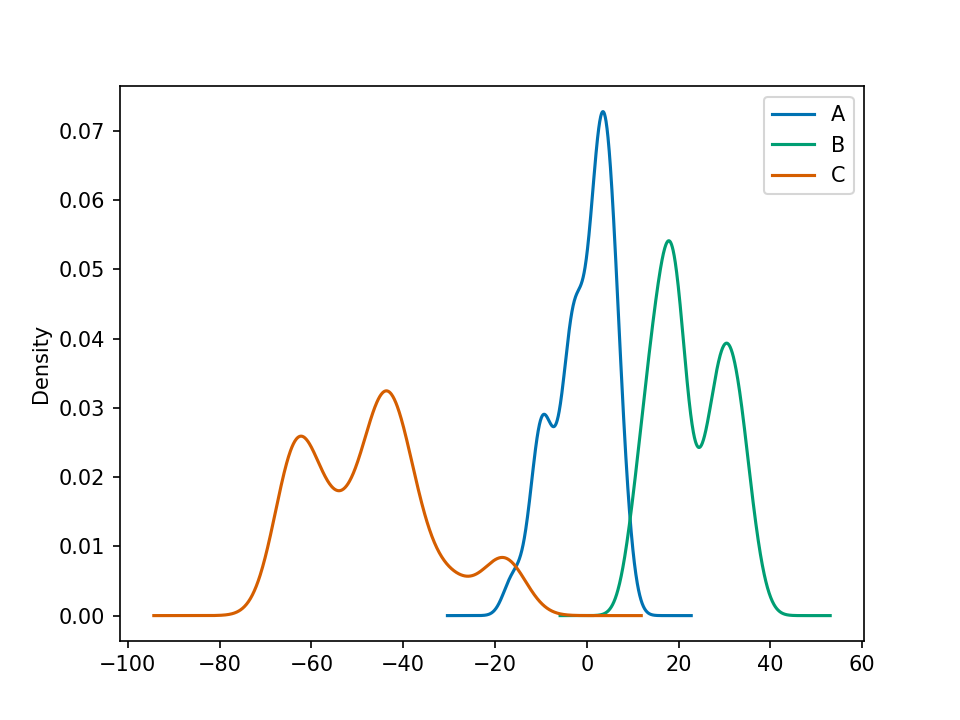

In [17]:
'''

kernel density estimate plots. Which are useful for visualizing an estimate of a variable's probability density function. Kernel density estimation plots come in handy in data science application 
where you want to derive a smooth continuous function from a given sample. 
'''

df.plot.kde();

### pandas.tools.plotting

[Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [22]:
'''

The iris data set is a classic multivariate data set, which includes the sepal length, sepal width, petal length, and petal width for hundreds of samples of three species of the iris flower. pandas has a plotting tool that allows us to create a scatter matrix from a DataFrame. 

A scatter matrix is a way of comparing each column in a DataFrame to every other column in a pairwise fashion. Let's use it to visualize the iris dataframe and see what insights we can gain from our data. 

The scatter matrix creates scatter plots between the different variables and histograms along the diagonals. 
This allows us to quickly see some of the more obvious patterns in the data set. 
Looking at the scatter plots, it appears that there are some distinct groupings of 
the points, which might indicate that there could be some clustering going on. And while this looks impressive and is certainly useful, realize that in the last two weeks you have gained all of the skills to manually build these kinds of plots if you want to. This is nothing more than a four by four grid of subplots, 
with some plots histograms and the others scatterplots.

'''

iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<IPython.core.display.Javascript object>


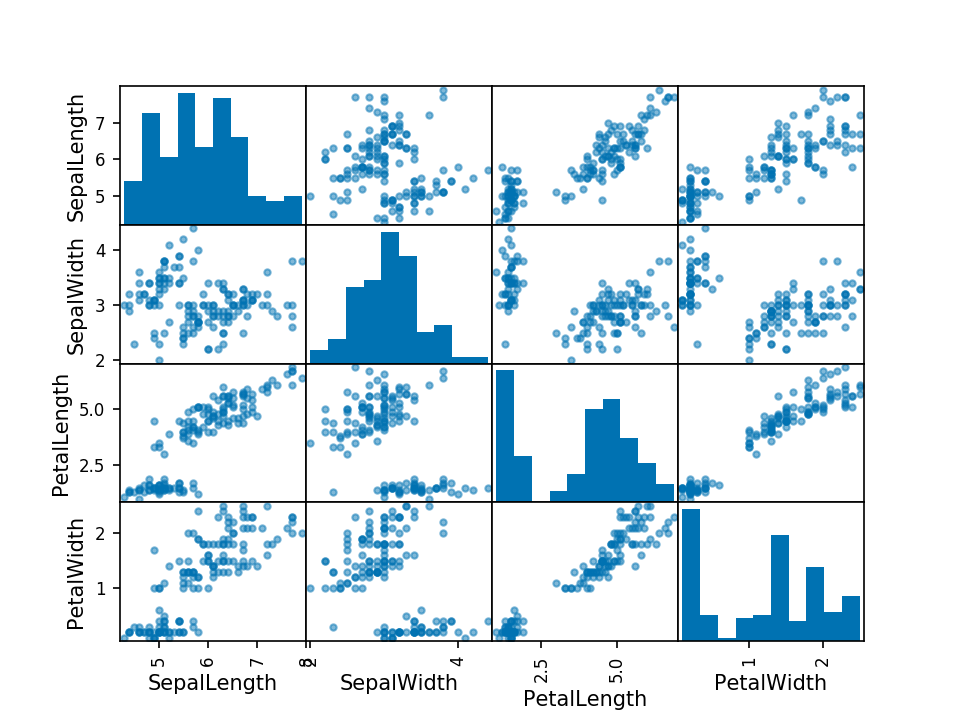

In [19]:
pd.tools.plotting.scatter_matrix(iris);

<IPython.core.display.Javascript object>


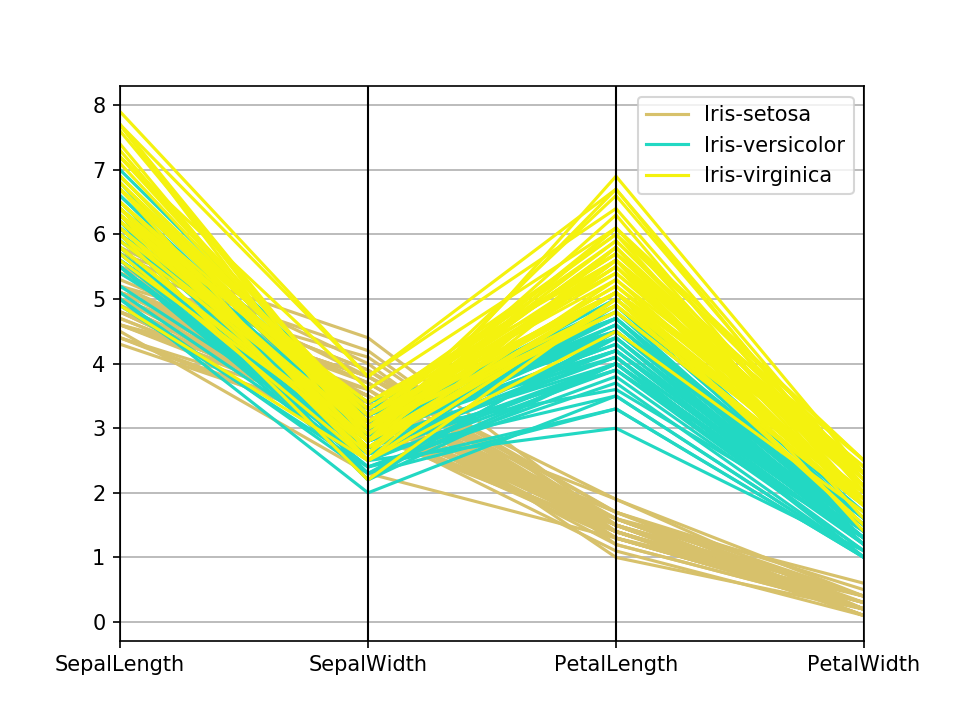

In [20]:
'''
Let's look at one more plotting tool in pandas which will help us visualize 
multivariate data. pandas includes a plotting tool for creating parallel coordinates plots. 
Parallel coordinate plots are a common way of visualizing high dimensional multivariate data. 
Each variable in the data set corresponds to an equally spaced parallel vertical line. The values of each variable are then connected by lines between for each individual observation. 
Coloring the lines by class, in this example the species of flower, 
allows the viewer to more easily see any patterns or clustering. 
For instance, looking at our iris data set, we can see that the petal length and 
petal width are two variables that split the different species fairly clearly. With iris virginica having the longest and widest petals. And iris setosa having the shortest and narrowest petals. Well that's it for visualization in pandas. 
'''

plt.figure()
pd.tools.plotting.parallel_coordinates(iris, 'Name');

# Seaborn

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [29]:
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

<IPython.core.display.Javascript object>


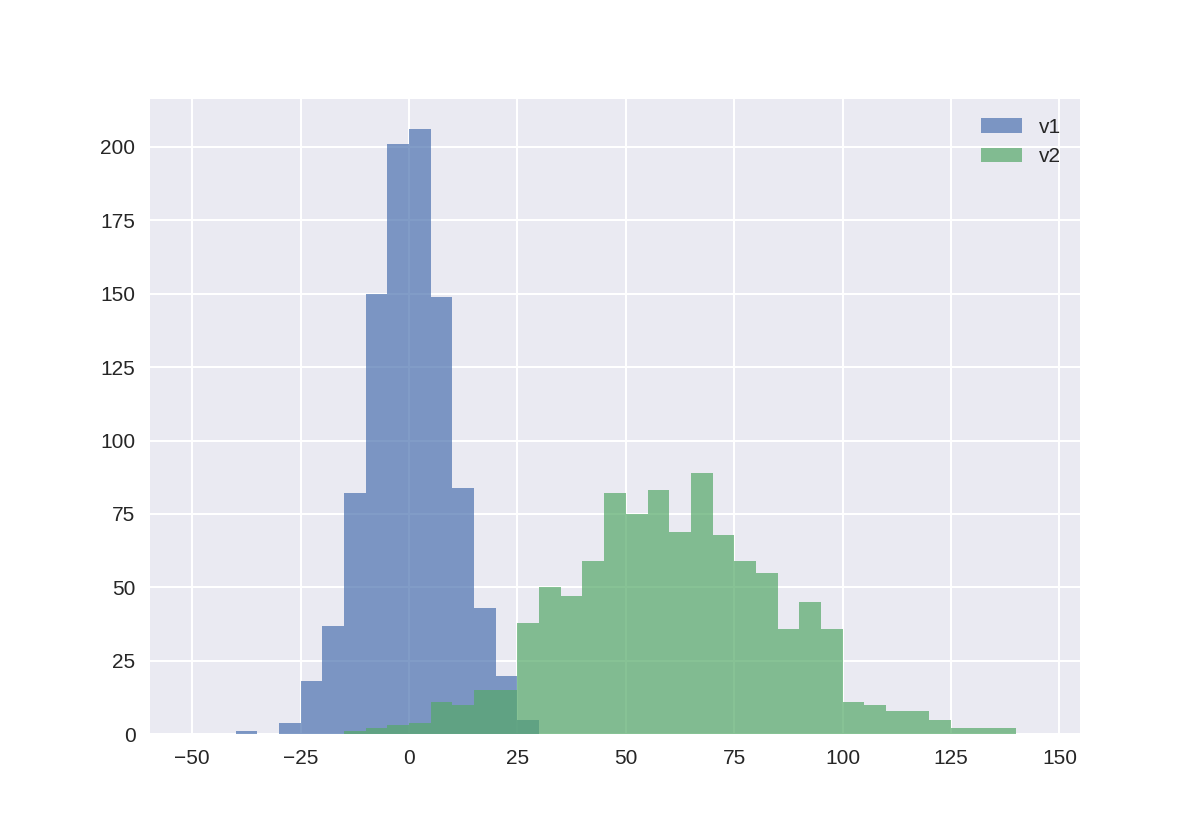

In [30]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend();
'''
Looking at the histograms we can quickly see that v1 has a lower mean than v2, and that v2 has a larger spread than v1. 
'''

<IPython.core.display.Javascript object>


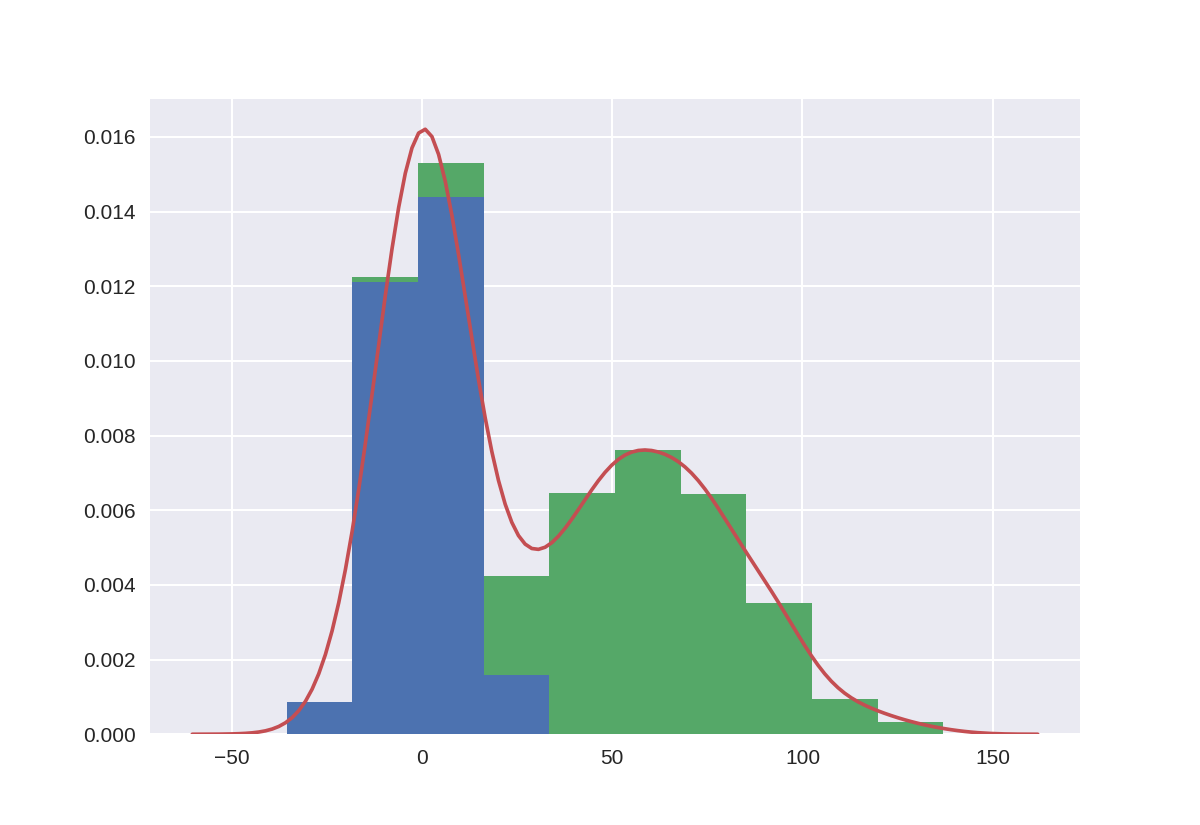

In [31]:
# plot a kernel density estimation over a stacked barchart

'''

Next, let's create a variable v3, which is the combination of v1 and v2. 
We'll use v3 to plot a kernel density estimate plot over the stacked histogram. The kernel density estimation plot estimates the probability density function of the variable v3. Plotting it on top of the stacked histograms of v1 and v2 allows us to see the relationship between these two visualizations. 
'''
plt.figure()
plt.hist([v1, v2], histtype='barstacked', normed=True);
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3);

<IPython.core.display.Javascript object>


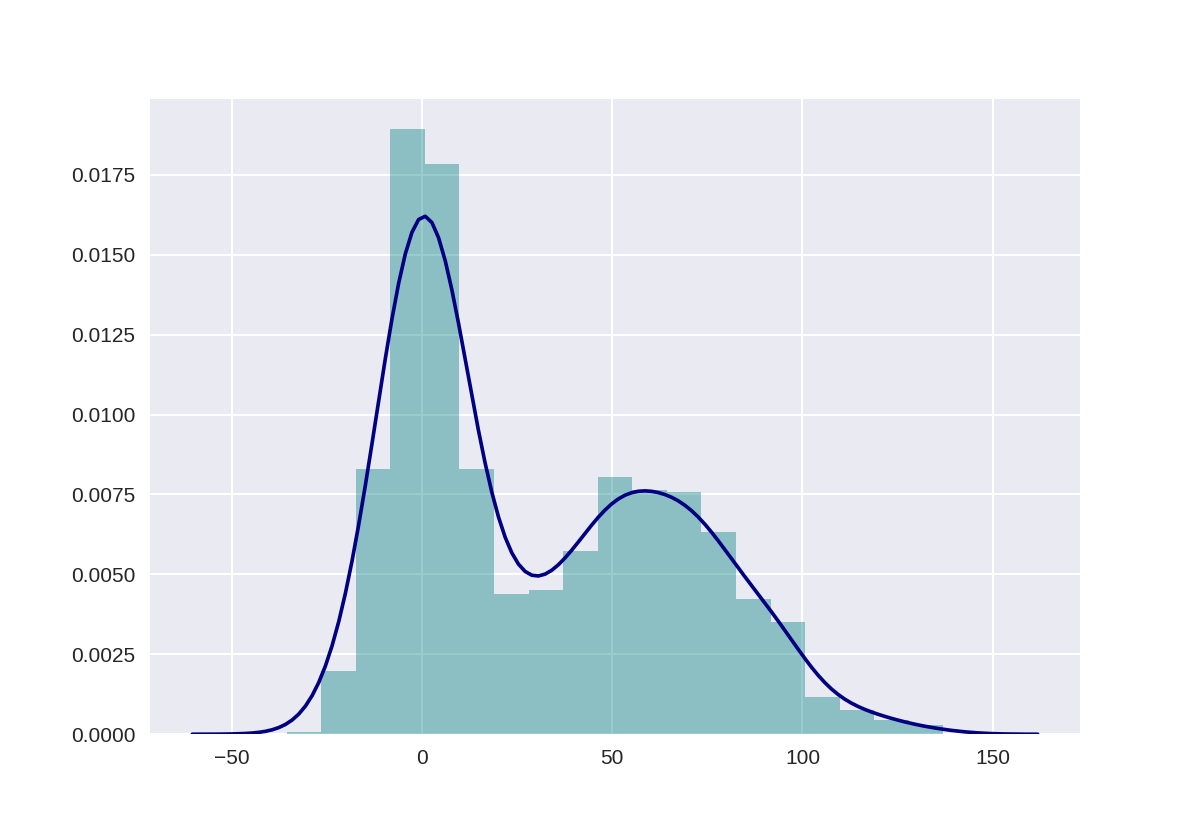

In [32]:
plt.figure()
# we can pass keyword arguments for each individual component of the plot
sns.distplot(v3, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});

<IPython.core.display.Javascript object>


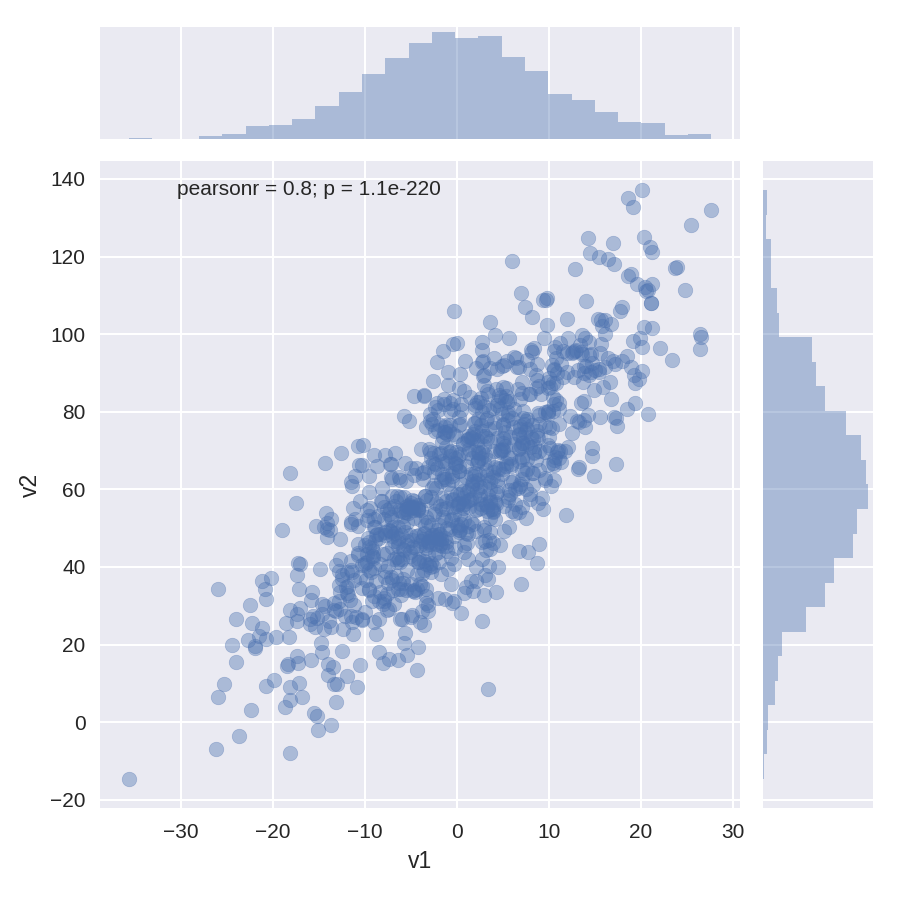

In [33]:
'''

The jointplot creates a scatterplot along the histograms for each individual variable on each axis. 
You've actually seen jointplots in module two and created them manually yourself. 
To create a jointplot, we just type sns.jointplot and pass in the two series, v1 and v2. 
Setting alpha to 0.4 will help with visualizing overlapping points. The jointplot allows us to visualize the distribution of the two variables individually. As well as relationships between the variables. Using jointplot we can see that v1 and v2 appear to be normally distributed variables that are positively correlated. Because Seaborn uses matplotlib we can tweak the plots using Matplotlib's tools. 

'''

sns.jointplot(v1, v2, alpha=0.4);

<IPython.core.display.Javascript object>


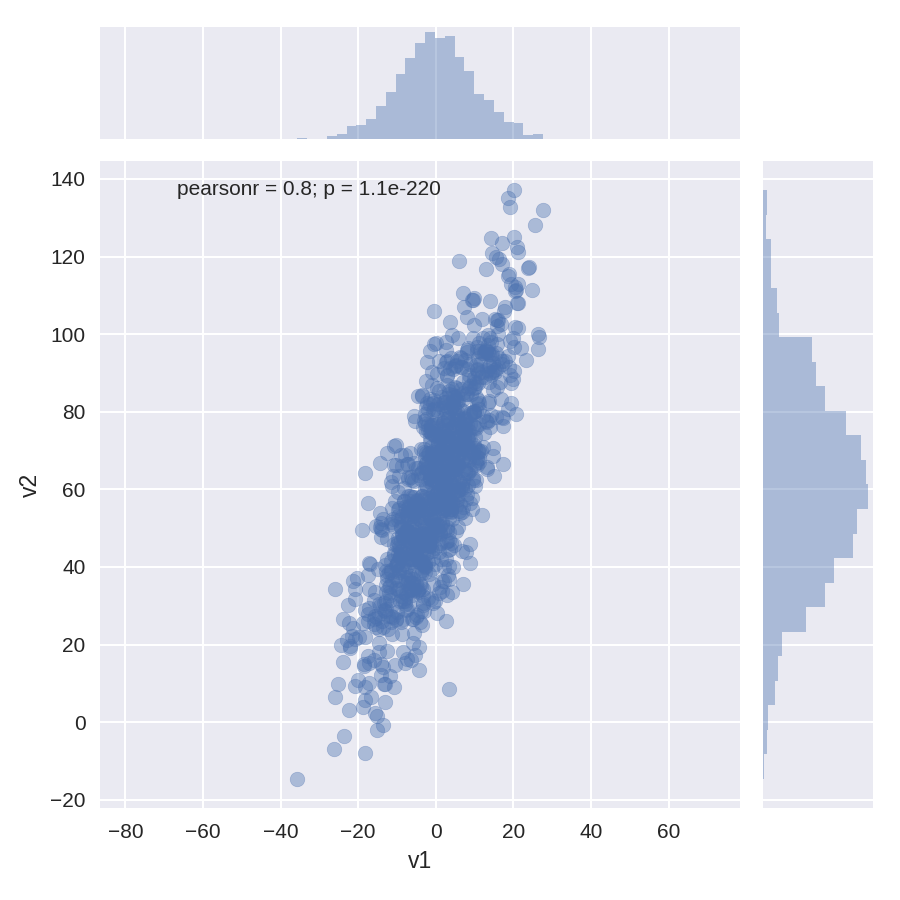

In [34]:
grid = sns.jointplot(v1, v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

<IPython.core.display.Javascript object>


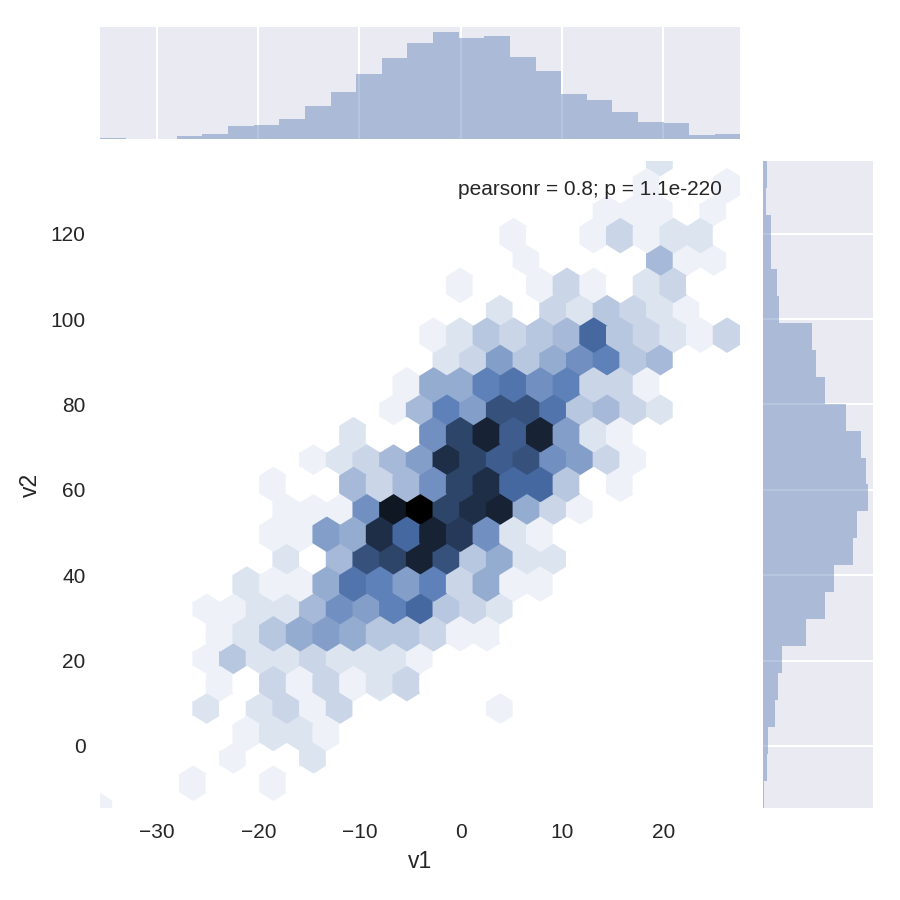

In [35]:
sns.jointplot(v1, v2, kind='hex');

<IPython.core.display.Javascript object>


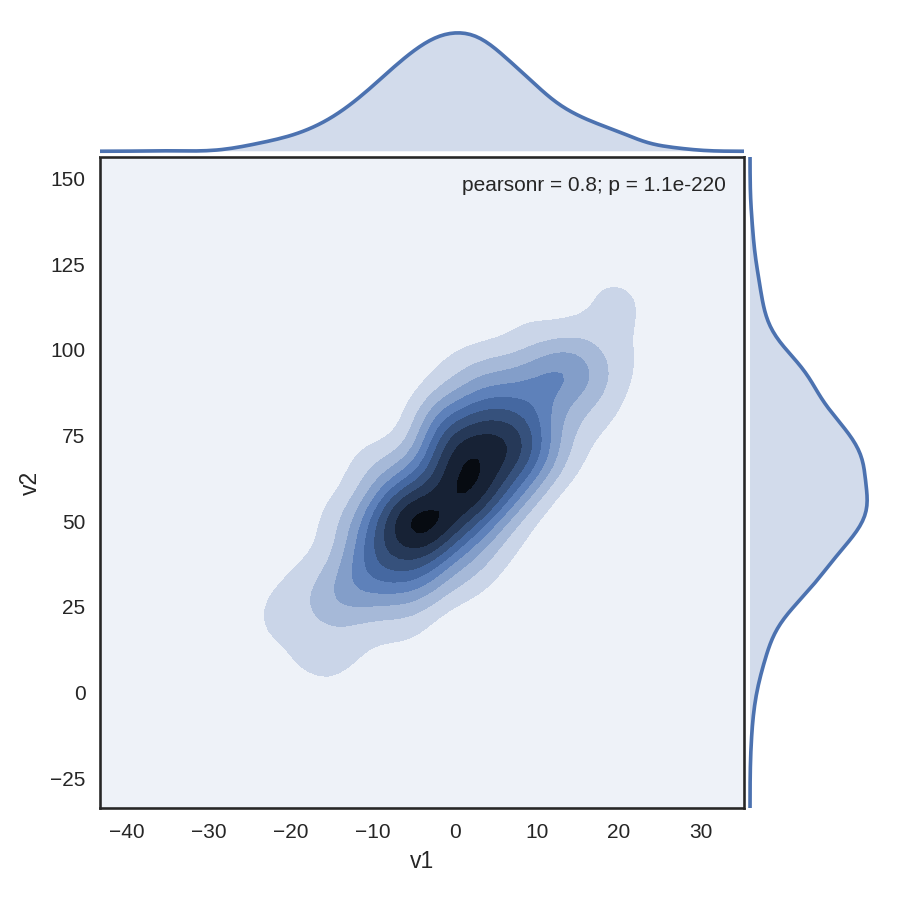

"\n\nNow we'll create a joint plot just like before, except this time, let's set the kind to kde. \nFinally, let's space to 0, which will plot the marginal distributions directly on the border of the scatter plot. We can see that Seaborn has some built-in options for easy customization. And provides us with easy to create and beautiful plots for exploring the distributions of your data. For the last part of this tutorial, let's load in the iris dataset, to see how Seaborn handles visualizations of categorical data. \n"

In [40]:
# set the seaborn style for all the following plots
sns.set_style('white')

sns.jointplot(v1, v2, kind='kde', space=0);

'''

Now we'll create a joint plot just like before, except this time, let's set the kind to kde. 
Finally, let's space to 0, which will plot the marginal distributions directly on the border of the scatter plot. We can see that Seaborn has some built-in options for easy customization. And provides us with easy to create and beautiful plots for exploring the distributions of your data. For the last part of this tutorial, let's load in the iris dataset, to see how Seaborn handles visualizations of categorical data. 
'''

In [37]:
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<IPython.core.display.Javascript object>


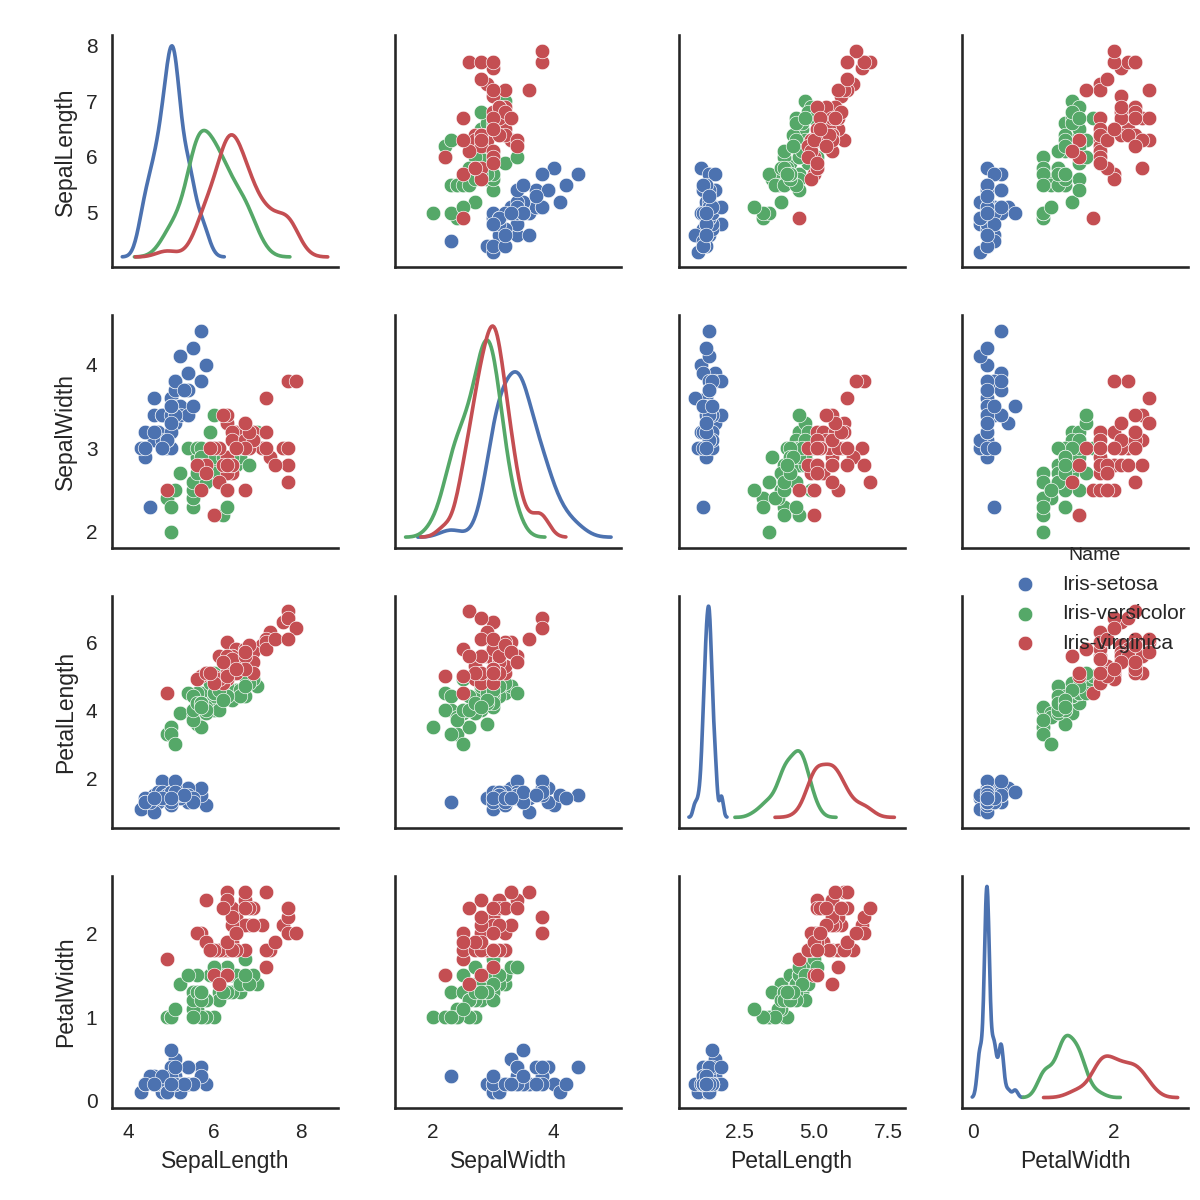

In [38]:
sns.pairplot(iris, hue='Name', diag_kind='kde', size=2);

'''
We pass in the iris data of frame. 
Tell it to map name to different colors using the hue parameter. 
And tell it to use a kde along the diagonals instead of the default histograms. 
Looking at the pair plot, it's clear there are some clusters in the data set. It looks like peddle length and peddle width are good options for separating the observations, whereas width is not a strong separator
'''

<IPython.core.display.Javascript object>


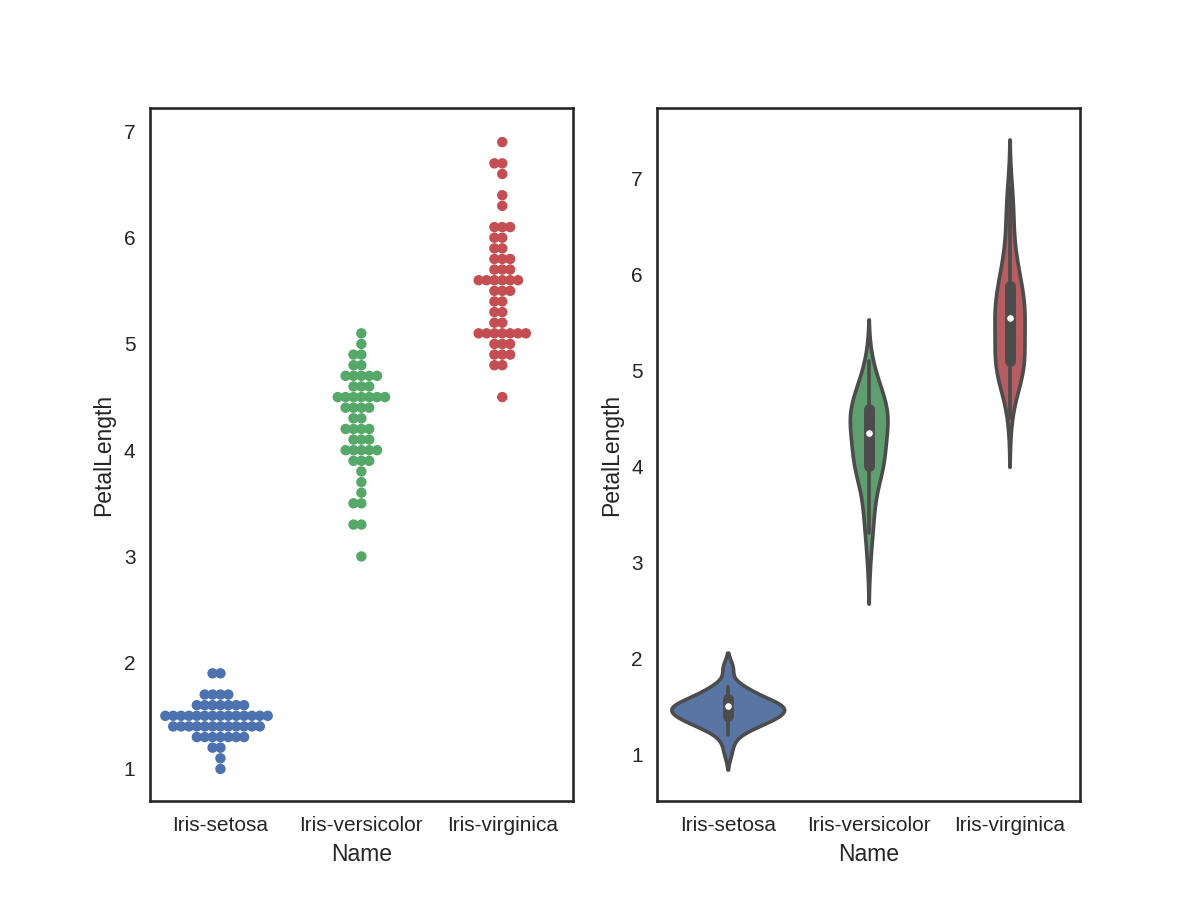

In [39]:
'''

Next, we'll create the swarmplot, passing in Name and PetalLength, and the data, which is the iris data frame. 
For the next subplot, we'll create the violinplot, again passing in Name, PetalLength and the iris data frame. 
Looking at the swarmplot, each species has its own column and each observation's petal length is shown. With more common values appearing as the wide parts of the cluster, much like a histogram. 
The violinplot is like box plot with a rotated kernel density estimation on each side. 
Violin plots convey more information than box plots and are able to show particular phenomena within the distribution that box plots are unable to convey such as multi modality. Seaborn is a library that not only adds new styles and visual aspects. But also introduces new functionality such as joint plots, scatter matrix plots, and violin plots. 


'''

plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot('Name', 'PetalLength', data=iris);
plt.subplot(122)
sns.violinplot('Name', 'PetalLength', data=iris);